In [ ]:
# data: https://www.sidc.be/SILSO/datafiles, Look for the "Yearly mean total sunspot number" dataset. Download the CSV file.
# Easy Q4. Determine the approximate period of solar activity cycles and identify the years of minimum and maximum activity between 1960 and 2020 using historical yearly mean sunspot numbers (numerical)

Attempting to load data from: ../data_local/SILSO/SN_y_tot_V2.0.csv
Data loaded successfully.
Filtering data between 1960 and 2020...
Found 61 yearly records in the specified range.

Approximate Average Solar Cycle Period (Min-to-Min): 11.00 years

Approximate Years of Activity Maxima (Peaks) in 1960-2020:
  - 1968 (Mean SSN: 150.0)
  - 1979 (Mean SSN: 220.1)
  - 1989 (Mean SSN: 211.1)
  - 2000 (Mean SSN: 173.9)
  - 2014 (Mean SSN: 113.3)

Approximate Years of Activity Minima (Troughs) in 1960-2020:
  - 1964 (Mean SSN: 15.0)
  - 1976 (Mean SSN: 18.4)
  - 1986 (Mean SSN: 14.8)
  - 1996 (Mean SSN: 11.6)
  - 2008 (Mean SSN: 4.2)

Generating plot...


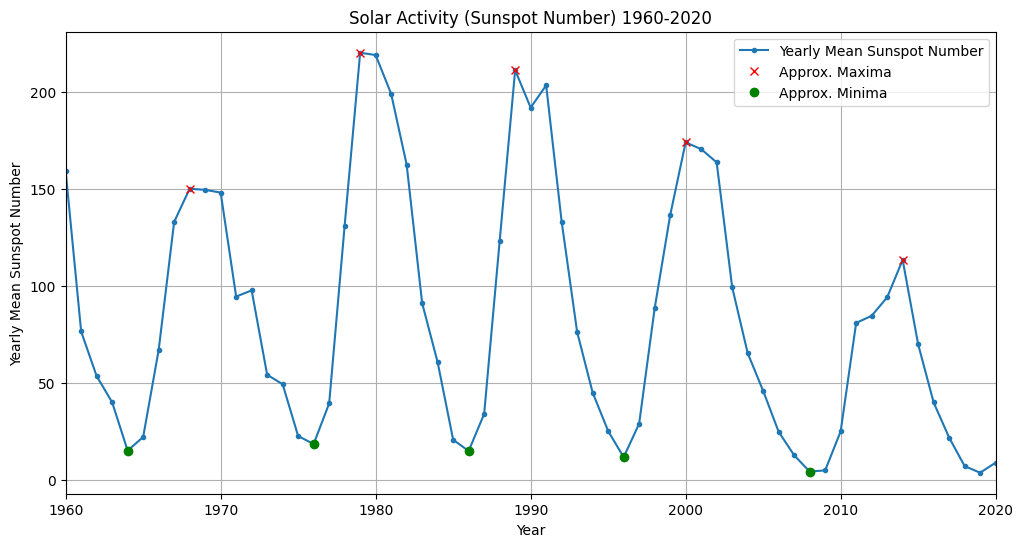

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import os

# --- Configuration ---
# !!! UPDATE THIS PATH if the file is not in the same directory as the notebook !!!
# !!! VERIFY the exact filename you downloaded from SILSO !!!
file_path = '../data_local/SILSO/SN_y_tot_V2.0.csv' # Example filename - CHANGE AS NEEDED

# --- Load Data ---
print(f"Attempting to load data from: {file_path}")

# Check if file exists
if not os.path.exists(file_path):
    print(f"ERROR: File not found at '{file_path}'")
    print("Please download the 'Yearly mean total sunspot number' CSV file from")
    print("https://www.sidc.be/SILSO/datafiles and place it correctly or update the path.")
else:
    try:
        # Load CSV data - SILSO CSV files use semicolon (;) as delimiter
        # Column names based on SILSO format: Year, Sunspot Number, StdDev, Obs, Definitive(1)/Provisional(0)
        col_names = ['Year', 'MeanSunspotNumber', 'StdDev', 'Observations', 'Definitive']
        sunspot_df = pd.read_csv(file_path, sep=';', header=None, names=col_names)
        print("Data loaded successfully.")

        # Convert Year column if it's not read as numeric (sometimes includes decimals like YYYY.5)
        # We'll floor it to integer year for filtering and plotting
        sunspot_df['YearInt'] = np.floor(sunspot_df['Year']).astype(int)

        # --- Filter Data for 1960-2020 ---
        print("Filtering data between 1960 and 2020...")
        filtered_df = sunspot_df[(sunspot_df['YearInt'] >= 1960) & (sunspot_df['YearInt'] <= 2020)].copy()

        if filtered_df.empty:
            print("ERROR: No data found in the range 1960-2020.")
        else:
            print(f"Found {len(filtered_df)} yearly records in the specified range.")

            # --- Analyze Solar Cycle ---
            years = filtered_df['YearInt'].values
            ssn = filtered_df['MeanSunspotNumber'].values

            # Find peaks (maxima) - adjust prominence/distance as needed
            # Prominence: Minimum height difference to be considered a peak
            # Distance: Minimum horizontal distance between peaks
            maxima_indices, _ = find_peaks(ssn, prominence=20, distance=5)
            maxima_years = years[maxima_indices]
            maxima_ssn = ssn[maxima_indices]

            # Find troughs (minima) by finding peaks in the inverted signal
            minima_indices, _ = find_peaks(-ssn, prominence=20, distance=5)
            minima_years = years[minima_indices]
            minima_ssn = ssn[minima_indices]

            # Calculate average period between minima
            if len(minima_years) > 1:
                avg_period = np.mean(np.diff(minima_years))
                print(f"\nApproximate Average Solar Cycle Period (Min-to-Min): {avg_period:.2f} years")
            else:
                avg_period = "N/A (less than 2 minima found)"
                print("\nCould not calculate average period (less than 2 minima found).")

            print("\nApproximate Years of Activity Maxima (Peaks) in 1960-2020:")
            for year, val in zip(maxima_years, maxima_ssn):
                print(f"  - {year} (Mean SSN: {val:.1f})")

            print("\nApproximate Years of Activity Minima (Troughs) in 1960-2020:")
            for year, val in zip(minima_years, minima_ssn):
                print(f"  - {year} (Mean SSN: {val:.1f})")

            # --- Plot Data ---
            print("\nGenerating plot...")
            plt.figure(figsize=(12, 6))
            plt.plot(years, ssn, label='Yearly Mean Sunspot Number', marker='.')
            plt.plot(maxima_years, maxima_ssn, "x", color='red', label='Approx. Maxima')
            plt.plot(minima_years, minima_ssn, "o", color='green', label='Approx. Minima')

            plt.title('Solar Activity (Sunspot Number) 1960-2020')
            plt.xlabel('Year')
            plt.ylabel('Yearly Mean Sunspot Number')
            plt.legend()
            plt.grid(True)
            plt.xlim(1960, 2020)
            plt.show()

    except pd.errors.EmptyDataError:
        print(f"ERROR: File '{file_path}' is empty or not a valid CSV.")
    except Exception as e:
        print(f"An error occurred: {e}")